In [1]:
import pandas as pd
# Load the CSV file
file_path = 'review.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
# 1 represents a positive review.
# 0 represents a negative review.
df.head()

,Unnamed: 0,review_body,label
0,0,Great CD: My lovely Pat has one of the GREAT v...,1
1,1,One of the best game music soundtracks - for a...,1
2,2,Batteries died within a year ...: I bought thi...,0
3,3,"works fine, but Maha Energy is better: Check o...",1
4,4,Great for the non-audiophile: Reviewed quite a...,1


In [2]:
# save the dataframe as a pickle file
df.to_pickle('raw.pkl')

In [3]:
import pandas as pd
# import the raw data
df = pd.read_pickle('raw.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14248118 entries, 0 to 14248117
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   review_body  object
 2   label        int64 
dtypes: int64(2), object(1)
memory usage: 326.1+ MB


In [4]:
# randomly select 0.5% of the data without mess up the review_body and label 
sampled_df = df.sample(frac=0.005, random_state=42)

# Rename the 'Unnamed: 0' column to 'id'
sampled_df = sampled_df.rename(columns={'Unnamed: 0': 'id'})

# Display the first few rows of the sampled DataFrame
print(sampled_df.head())

              id                                        review_body  label
6611592  6611592  I have read this book three times and it is ju...      1
301929    301929  Time for a new one: I bought this CD, (plus th...      1
8111384  8111384  Works great in my Galaxy S3, so much faster th...      1
4305293  4305293  If you have been a victim of a family murder, ...      1
4292270  4292270  This great story could be called a psychologic...      1


In [9]:
# save the sampled data as a pickle file
sampled_df.to_pickle('review.pkl')

In [5]:
import pandas as pd
# load the dataframe from the pickle file
sampled_df = pd.read_pickle('review.pkl')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_label_distribution(df, label_column='label', palette='viridis'):
    """
    Plots the distribution of labels in a given dataset.

    Parameters:
    - df: pandas DataFrame containing the data.
    - label_column: str, the name of the column containing the labels.
    - palette: str, the color palette to use for the plot.
    """
    # Create the plot
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(
        data=df,
        x=label_column,
        hue=label_column,
        palette=palette,
        order=df[label_column].value_counts().index,
        legend=False
    )

    # Add frequency labels above each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom'
        )

    # Set titles and labels
    plt.title("Label Distribution")
    plt.xlabel("Label")
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()


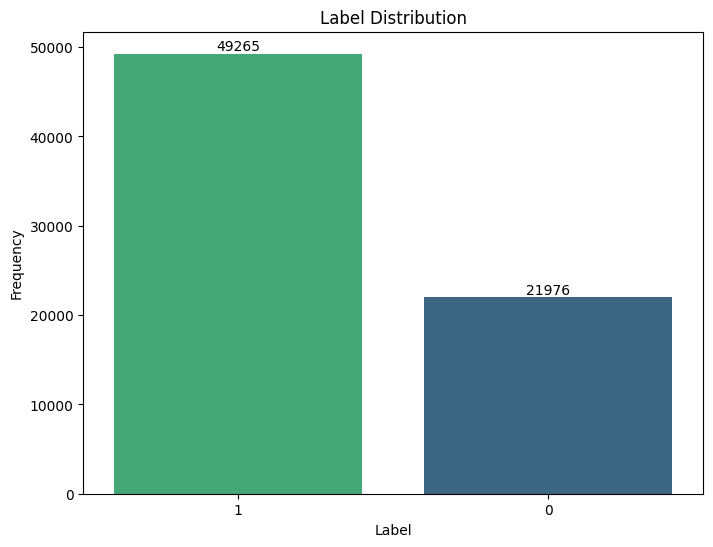

In [12]:
# plot the distribution of labels in the dataset
plot_label_distribution(sampled_df)

In [6]:
# print the length of the sampled dataframe
print(len(sampled_df))
# remove the rows with empty review_body or label
sampled_df = sampled_df.dropna(subset=['review_body', 'label'])
print(len(sampled_df))
# remove the rows where the review_body has less than 5 words
sampled_df = sampled_df[sampled_df['review_body'].str.split().str.len() >= 5]
print(len(sampled_df))

71241
71240
68050


In [7]:
# Separate the classes
class_0 = sampled_df[sampled_df['label'] == 0]
class_1 = sampled_df[sampled_df['label'] == 1]

# Determine the number of samples in the minority class (class 0)
num_class_0 = len(class_0)

# Randomly sample from class 1 to match the number of samples in class 0
class_1_under_sampled = class_1.sample(n=num_class_0, random_state=42)

# Combine the under-sampled class 1 with class 0 to create a balanced dataset
df_balanced = pd.concat([class_0, class_1_under_sampled])

# Shuffle the dataset to mix the classes
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the class distribution in the balanced dataset
print(df_balanced['label'].value_counts())

# Save the balanced dataset as a pickle file
df_balanced.to_pickle('review_balanced.pkl')

label
0    21685
1    21685
Name: count, dtype: int64


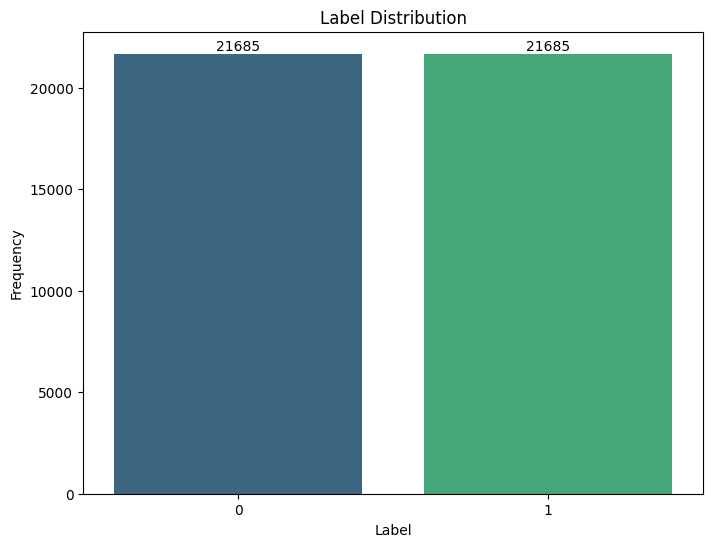

In [23]:
# load the balanced dataset from the pickle file
df_balanced = pd.read_pickle('review_balanced.pkl')
# plot the distribution of labels in the dataset after balancing
plot_label_distribution(df_balanced)

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
def generate_wordcloud(df, column_name, sample_fraction=0.05, random_state=42):
    """
    Generates and displays a word cloud from a specified column in a DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column_name: str, the name of the column containing text data.
    - sample_fraction: float, the fraction of the data to sample
    - random_state: int, random seed for reproducibility
    """
    # Convert all elements in the specified column to strings
    df[column_name] = df[column_name].astype(str)

    # Randomly select a fraction of the data
    sampled_df = df.sample(frac=sample_fraction, random_state=random_state)

    # Combine the text from the sampled data
    sampled_text = " ".join(sampled_df[column_name].tolist())

    # Define stopwords
    stopword = set(STOPWORDS)

    # Create the word cloud
    wordcloud = WordCloud(
        stopwords=stopword,
        width=1600,
        height=800,
        max_words=100,
        colormap='RdYlGn'
    ).generate(sampled_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

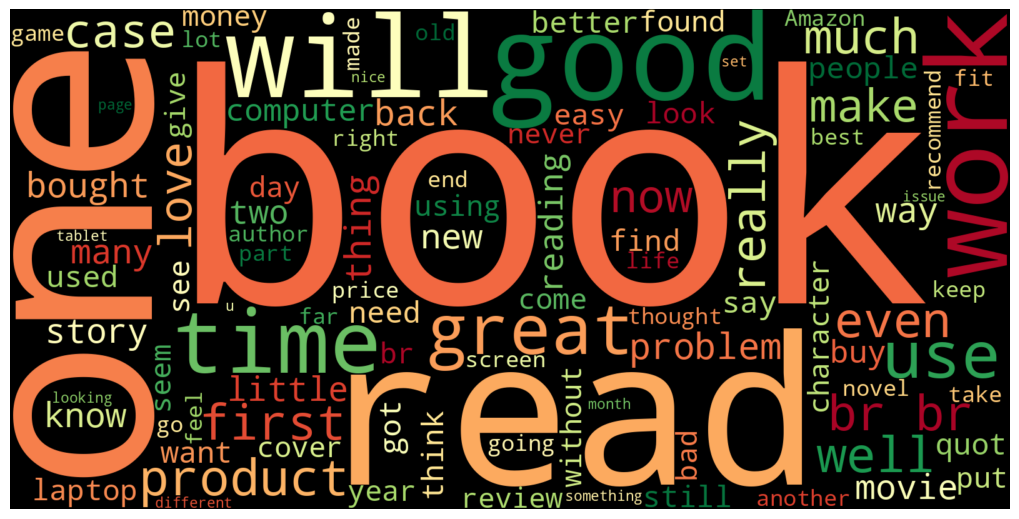

In [17]:
# generate a word cloud from the 'review_body' column in the balanced dataset
generate_wordcloud(df_balanced, 'review_body')

In [19]:
df_balanced.head()

,id,review_body,label
0,1558703,Waste of money: Save your money it's not worth...,0
1,4508221,"The book was interesting, Dr Dyer is a very ta...",1
2,1037943,painted bulb: Clear yellow glass would be nice...,0
3,12701540,I have only had the battery for a week and it ...,1
4,491373,Not this time: I adored Liz Ireland's previous...,0


In [26]:
# data cleaning
df_balanced['review_body'] = (
    df_balanced['review_body']
    # Remove HTML tags
    .str.replace(r'<br\s*/?>', ' ', regex=True)
    # Remove URLs
    .str.replace(r'[^a-zA-Z\s.,!?;:\'-]', '', regex=True)
    # Remove all digits
    .str.replace(r'\d+', '', regex=True)
    # Remove extra whitespaces
    .str.replace(r'\s+', ' ', regex=True)
    # Remove leading and trailing whitespaces
    .str.strip()
    # Remove 'u' characters
    .str.replace(r'u\s', ' ', regex=True)
)

df_balanced.head()

,id,review_body,label
0,1558703,Waste of money: Save your money it's not worth...,0
1,4508221,"The book was interesting, Dr Dyer is a very ta...",1
2,1037943,painted bulb: Clear yellow glass would be nice...,0
3,12701540,I have only had the battery for a week and it ...,1
4,491373,Not this time: I adored Liz Ireland's previous...,0


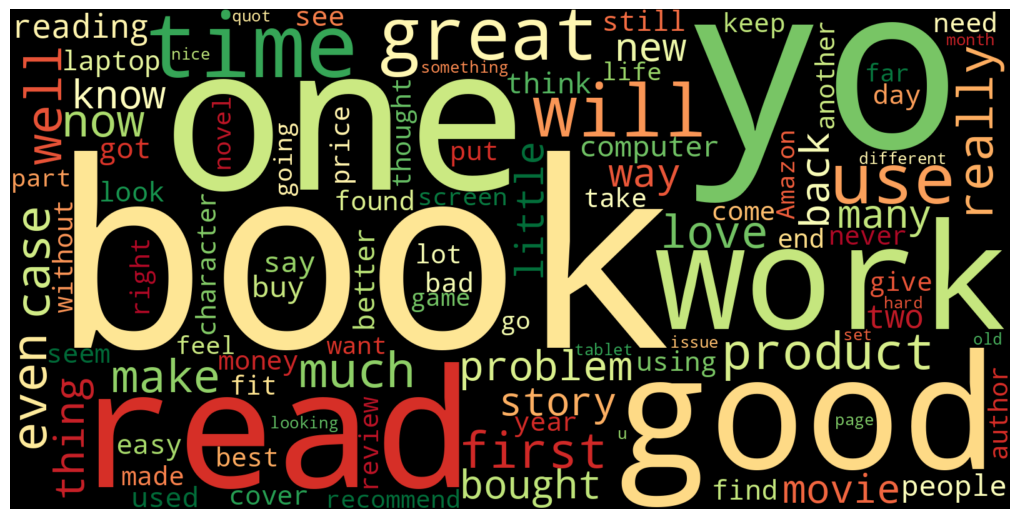

In [27]:
# generate a word cloud from the 'review_body' column in the balanced dataset
generate_wordcloud(df_balanced, 'review_body')

In [28]:
# save df_balanced as a csv file
df_balanced.to_csv('data.csv', index=False)